# 🏢 Predicting Employee Attrition using IBM HR Analytics Dataset

## 🔍 Objective:
Build a machine learning model to predict whether an employee will leave the company using HR data.

## 📦 Step 1: Load the Dataset

In [6]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')  # local path
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 📊 Step 2: Explore the Data

In [7]:
df.shape
df.info()
df.describe()
df['JobRole'].value_counts()
df['OverTime'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,count
OverTime,
No,1054
Yes,416


## 🧹 Step 3: Clean and Preprocess

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df_encoded = df.copy()

# Encode categorical variables
categoricals = df_encoded.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categoricals:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

## 📈 Step 4: Exploratory Data Analysis (EDA)

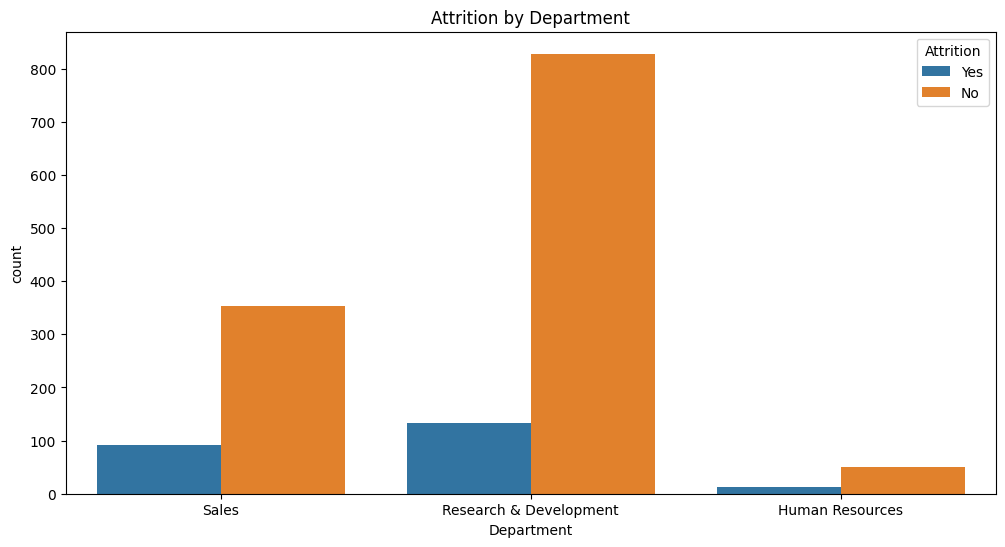

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.show()

## 🤖 Step 5: Build ML Models

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Define models (no 'use_label_encoder' needed anymore)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', verbosity=0)
}

# Evaluate each model using cross-validation (recall)
for name, model in models.items():
    recall_scores = cross_val_score(model, X_res, y_res, cv=5, scoring='recall')
    print(f"{name} Average Recall: {recall_scores.mean():.4f}")


Logistic Regression Average Recall: 0.8054
Random Forest Average Recall: 0.9117
XGBoost Average Recall: 0.8413


## 📏 Step 6: Evaluate Performance

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[353  16]
 [ 39 332]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       369
           1       0.95      0.89      0.92       371

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



## 📌 Step 7: Interpret Results

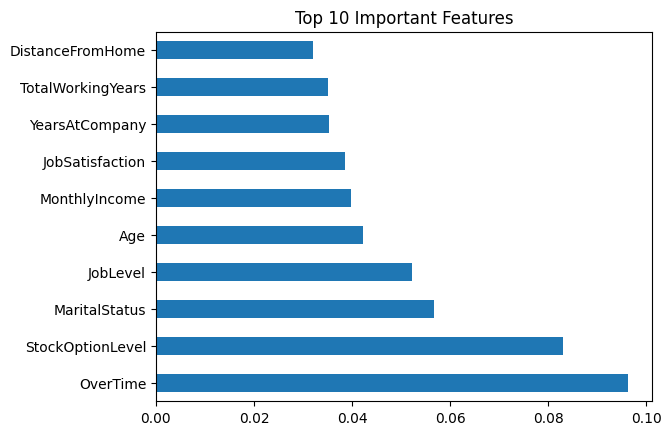

In [13]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

## 📝 Step 8: Final Notes

This project showed how to handle real-world HR data, perform preprocessing, address class imbalance, and interpret a model’s prediction to aid HR in retaining employees.